In [1]:
import matplotlib.pyplot as plt

In [ ]:
0.9755*2

In [2]:
class vertex :
    def __init__ (self , x , y , tipo = None):
        self.x = x
        self.y = y
        self.tipo = tipo
    
    def __str__(self):
        return  f"""  (x: {self.x}, y:{self.y}, tipo: {self.tipo})  """

    def __repr__(self):
        return  f"""  (x: {self.x}, y:{self.y}, tipo: {self.tipo})  """
    
    def __lt__(self,other):
        if (self.y < other.y or self.y == other.y and self.x > other.x):
            return True 
        else:
            return False        
    def __gt__(self,other):
        if (self.y > other.y or self.y == other.y and self.x > other.x):
            return True 
        else:
            return False

class dlcEdge :
    def __init__ (self , start , end , next_edge =None, helper = None):
        self.start = start
        self.end = end
        self.next = next_edge
        self.helper = helper
    
    def __str__(self):
        return  f"({self.start}, {self.end})"

    def __repr__(self):
        return  f"({self.start}, {self.end})"
    

In [3]:
def prod(v,w):
    return v[0]*w[1] -w[0]*v[1]

def minus(v,w):
    return (v[0]-w[0],v[1]-w[1])
    # regresa a que tipo de vertice corresponde v2 , si v1 y v3 son sus vecinos dentro del poligono
    #que en sentido antihorario recorre de v1 -> v2 -> v3
def type(v1, v2, v3):
    if min(v1[1],v3 [1]) >=v2 [1]:
        if prod(minus(v1 ,v2),minus(v3 ,v2)) >0:
            return 'merge'
        else:
            return 'end'
    elif max(v1[1],v3 [1]) <= v2 [1]:
        if prod(minus(v1 ,v2),minus(v3 ,v2)) >0:
            return 'split'
        else:
            return 'start'
    return 'regular'

In [4]:
def plotPoints(vertex_list):
    x = []
    y = []

    for i in vertex_list:
        x.append(i[0])
        y.append(i[1])       
    x.append(vertex_list[0][0])  
    y.append(vertex_list[0][1]) 
        
    plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
        marker='o', markerfacecolor='blue', markersize=12)
    
    
    plt.ylim(-1,11)
    plt.xlim(-1,11)
    
    # naming the x axis
    plt.xlabel('x - axis')
    # naming the y axis
    plt.ylabel('y - axis')
    

def plotPointsTypes(vertex_list):

    x = []
    y = []
    markers = []

    for i in vertex_list:
        print(i)
        x.append(i.x)
        y.append(i.y)
        markers.append(get_marker_for_attribute(i.tipo))  # Get appropriate marker

    x.append(vertex_list[0].x)  # Close the loop
    y.append(vertex_list[0].y)
    markers.append(get_marker_for_attribute(vertex_list[0].tipo))
    

    plt.plot(x, y, color='green', linestyle='dashed', linewidth=3)

    # Plot each point individually with its specific marker
    for i in range(len(x)):
        plt.plot(x[i], y[i], marker=markers[i], markerfacecolor='blue', markersize=12)
    
    plt.ylim(-1, 11)
    plt.xlim(-1, 11)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    
def plotYMonoone(vertex_list, d):

    x = []
    y = []
    markers = []
    
    xd = []
    yd = []
    
    for i in vertex_list:
        x.append(i.x)
        y.append(i.y)
        markers.append(get_marker_for_attribute(i.tipo))  # Get appropriate marker
        
    for i in d:
        xd.append(i[0].x)
        yd.append(i[0].y)
        xd.append(i[1].x)
        yd.append(i[1].y)

    x.append(vertex_list[0].x)  # Close the loop
    y.append(vertex_list[0].y)
    markers.append(get_marker_for_attribute(vertex_list[0].tipo))
    
    plt.plot(xd, yd, color='red', linestyle='dashed', linewidth=3)
    plt.plot(x, y, color='green', linestyle='dashed', linewidth=3)

    # Plot each point individually with its specific marker
    for i in range(len(x)):
        plt.plot(x[i], y[i], marker=markers[i], markerfacecolor='blue', markersize=12)
    
    plt.ylim(-1, 11)
    plt.xlim(-1, 11)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')

# Define a function to map attribute values to markers
def get_marker_for_attribute(attribute_value):
    # Customize this mapping based on your needs
    if attribute_value == 'merge':
        return 'v'
    elif attribute_value == 'end':
        return 's'
    elif attribute_value == 'split':
        return '^'
    elif attribute_value == 'start':
        return '8'
    elif attribute_value == 'regular':
        return 'o'


In [5]:
def gen_dcl_de_seq(seq):
    l_seq=len(seq)
    dledge_0 = dlcEdge(seq [0], seq [1])
    dledge = dledge_0
    i=1
    while i < l_seq -1:
        dledge.next= dlcEdge (seq[i], seq[i+1])
        dledge = dledge.next
        i+=1
    dledge.next= dlcEdge (seq[l_seq -1], seq [0])
    dledge = dledge.next
    dledge.next = dledge_0
    return dledge_0

def pointsToVerts(points):
    verts = []
    for i in range(len(points)-1): 
        tipo = type(points[i-1], points[i], points[i+1])
        x = points[i][0]
        y = points[i][1]
        vert = vertex(x,y,tipo)
        verts.append(vert)
    tipo = type(points[-2], points[-1], points[0])
    x = points[-1][0]
    y = points[-1][1]
    vert = vertex(x,y,tipo)
    verts.append(vert)
            
    return(verts)

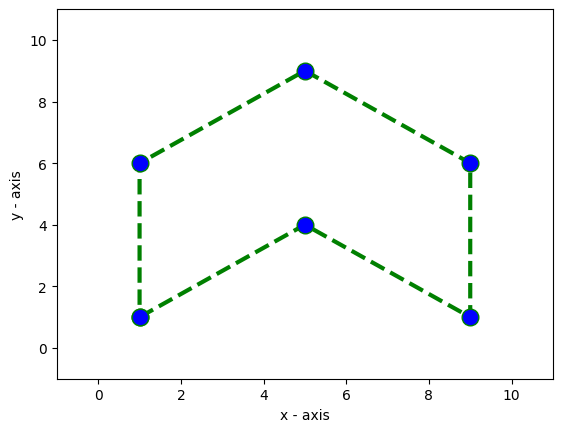

In [6]:
test_case = [(1,1),(5, 4),(9,1),(9,6),(5,9),(1, 6)]

plotPoints(test_case)
 

  (x: 1, y:1, tipo: end)  
  (x: 5, y:4, tipo: split)  
  (x: 9, y:1, tipo: end)  
  (x: 9, y:6, tipo: regular)  
  (x: 5, y:9, tipo: start)  
  (x: 1, y:6, tipo: regular)  


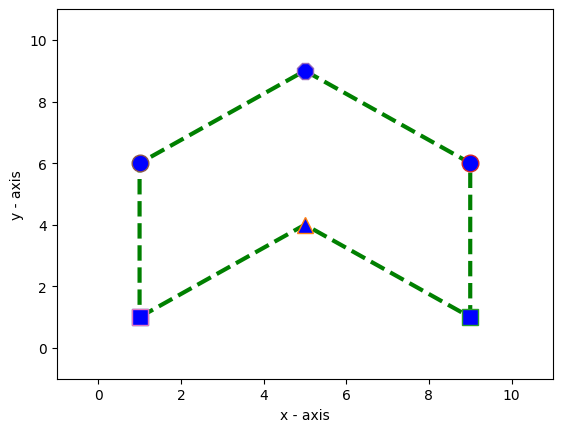

In [7]:
vertices = pointsToVerts(test_case)
plotPointsTypes(vertices)

### HELPER FUNCTIONS

In [8]:
def dlc_to_list(segs, len):
    e = []
    ei = segs
    for i in range(len):  
        e.append(ei)
        ei = ei.next
    return e

def makePriorityQueue(verts):
    q = sorted(verts, reverse=True)
    return(q)

def findEdgei(vertex, e):
    for i in range (len(e)):
        if (vertex == e[i].start):
            return i
        
def findEdgei_1(vertex, e):
    for i in range (len(e)):
        if (vertex == e[i].end):
            return i
        
def findEdgej(t, e):
    for j in range (len(e)):
        if (t[0] == e[j]):
            return j
        
def interiorToRigth(v_i, q):
    counter = 0
    for i in q:
        if (v_i.x < i.x):
            counter += 1
        else:
           counter -= 1 
    if (counter > 0):
        return True
    else:
        return False 
    

In [12]:
def makeMonotone(vertex):
    #SETUP
    #DEFINIMOS LOS SEGMENTOS DE LOS VERTICES
    segmentos = gen_dcl_de_seq(vertices)
    q = makePriorityQueue(vertex) #Event queue
    e = dlc_to_list(segmentos, len(vertex))  #Aristas   print(q)
    d = [] #Diagonales 
    t = [] #Estatus sweep line

    while(len(q) != 0):
        v_i = q.pop(0)
        if (v_i.tipo == "start"):
            i = findEdgei(v_i,e)
            #e[i]
            t.append(e[i])  
            e[i].helper = v_i
            
        elif(v_i.tipo == "end"):
            i_1 = findEdgei_1(v_i,e)
            if ((e[i_1].helper).tipo == "merge"):
                d.append((v_i, e[i_1].helper))
            t.remove(e[i_1])
            
        elif(v_i.tipo == "split"):
            j = findEdgej(t, e)
            i = findEdgei(v_i,e)
            
            d.append((v_i, e[j].helper))
            e[j].helper = v_i
            t.append(e[i])
            e[i].helper = v_i
            
        elif(v_i.tipo == "merge"):
            i_1 = findEdgei_1(v_i,e)
            
            if (e[i_1].helper.tipo == "merge"):
                    d.append((v_i, e[i_1].helper))
            t.remove(e[i_1])
            
            j = findEdgej(t, e)
            
            if (e[j].helper.tipo == "merge"):
                d.append((v_i, e[j].helper))
            e[j].helper = v_i  
                
        elif(v_i.tipo == "regular"):
            i_1 = findEdgei_1(v_i,e)
            i = findEdgei(v_i,e)
            if (interiorToRigth(v_i, q)):
                if (e[i_1].helper.tipo == "merge"):
                    d.append((v_i, e[i_1].helper))
                t.remove(e[i_1])
                t.append(e[i])
                e[i].helper = v_i
            else:
                j = findEdgej(t, e)
                if (e[j].helper.tipo == "merge"):
                    d.append((v_i, e[j].helper))
                e[j].helper = v_i
                
    return(d)            


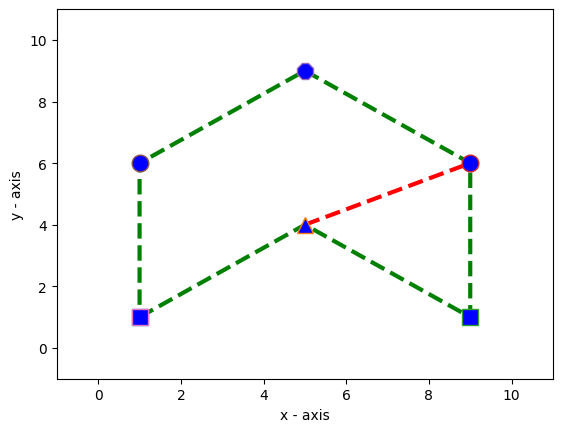

In [13]:
d = makeMonotone(vertices)
plotYMonoone(vertices, d)